# <u>Deep Learning Project</u>: Deep Fake Voice Recognition 

#### ANNA KOUTOUGERA(2022202304012) 
#### DESPOINA ANGELIKI MOISIDOU(2022202304016)

## **Introduction**

In recent years, generative Artificial Intelligence (AI) has advanced significantly, leading to the development of state-of-the-art systems capable of real-time voice conversion via a microphone. These sophisticated deep learning models can clone an individual’s speech and use it in online or phone conversations, leveraging consumer-level computing technology. This report examines the implications of such technology, focusing on classification of Real and Fake audio 

### <u>Original Audio Classification Dataset</u>: 

We present an original audio classification dataset, featuring recordings from 8 well-known public figures. This dataset includes both authentic audio collected from the internet and AI-generated speech produced via Retrieval-based Voice Conversion (RVC).

Table 1
| Photo                  | Individual             | Source                       | Length (MM:SS) |
|------------------------|------------------------|------------------------------|----------------|
| <img src="./celebrity-pictures/Joe_Biden.jpeg" width="50"/>     | Joe Biden              | Victory Speech[2]              | 10:00          |
| <img src="./celebrity-pictures/Ryan-Gosling.webp" width="50"/>  | Ryan Gosling           | Golden Globes Speech[3]        | 1:33           |
| <img src="./celebrity-pictures/Elon-Mask.jpeg" width="50"/>     | Elon Musk              | Commencement Speech[4]         | 10:00          |
| <img src="./celebrity-pictures/Barack_Obama.jpeg" width="50"/>  | Barack Obama           | Victory Speech[5]              | 10:00          |
| <img src="./celebrity-pictures/Margot-Robbie.jpeg" width="50"/> | Margot Robbie          | BAFTAs Speech[6]               | 1:19           |
| <img src="./celebrity-pictures/Linus-Sebastian.jpeg" width="50"/>| Linus Sebastian        | Stepping Down Monologue[7]     | 9:30           |
| <img src="./celebrity-pictures/Talor-Swift.jpeg" width="50"/>  | Taylor Swift           | Women in Music Speech[8]       | 10:00          |
| <img src="./celebrity-pictures/Donald_Trump.jpeg" width="50"/>  | Donald Trump           | Victory Speech[9]              | 10:00          |
|                        | **Total**              |                              | **62:22**      |


[2] [Victory Speech by Joe Biden:](https://www.youtube.com/watch?v=1AfNYztas2c) Last accessed: 07/23

[3] [Golden Globes Speech by Ryan Gosling:](https://www.youtube.com/watch?v=K8JLyUW_MSw) Last accessed: 07/23 

[4] [Commencement Speech by Elon Musk:](https://www.youtube.com/watch?v=MxZpaJK74Y4) Last accessed: 07/23 

[5] [Victory Speech by Barack Obama:](https://www.youtube.com/watch?v=IeCY-jKpoZ0) Last accessed: 07/23

[6] [BAFTAs Speech by Margot Robbie:](https://www.youtube.com/watch?v=-JA3_QBfjG8)Last accessed: 07/23

[7] [Stepping Down Monologue by Linus Sebastian:](https://www.youtube.com/watch?v=0vuzqunync8) Last accessed: 07/23 

[8] [Women in Music Speech by Taylor Swift:](https://www.youtube.com/watch?v=ZVpkFb9-fts) Last accessed: 07/23 

[9] [Victory Speech by Donald Trump:](https://www.youtube.com/watch?v=Qsvy10D5rtc) Last accessed: 07/23

**Eight** individuals were selected, each serving as a source for real speech data and its conversion into AI-generated speech. Table 1 details the sources of the speech. In total, **62 minutes and 22 seconds of speech** were collected from these eight individuals. Audio tracks were limited to a **maximum of ten minutes each**. The dataset exhibits varying levels of background noise; for instance, some tracks include cheering from supporters during Presidential victory speeches, while others, like Linus Sebastian's Stepping Down Monologue, are of production-level quality. In contrast, Elon Musk’s Commencement Speech was recorded from a distance without studio-quality equipment, resulting in lower quality. These tracks were intentionally chosen to introduce variation within the dataset.

### <u>CSV from Source Dataset after Cleaning </u>:

The following dataset is part of our datasource.It consists of audio features derived from segments of longer audio clips, but the cleanling and transformation processes of the audio are unknown. Upon evaluation, we identified a significant issue: during a random train/test split, segments from the same original audio clip could be divided between the training and test sets. This can cause data leakage, as segments from the same source share inherent characteristics, leading to overly optimistic performance assessments. To prevent this, it is crucial to include an additional column indicating the original audio source for each segment. This would enable grouping segments from the same source together, ensuring they are entirely within either the training or test set, thereby avoiding data leakage.


In [1]:
import pandas as pd



datasource = pd.read_csv("DATASET-balanced.csv")


datasource.head(3)

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE


For the reason we said before we decide to make our own audio cleaning and transformation and recreate a new csv dataset for further analysis.

## <u>Data Preparation</u>: 
For more details go to [notebook](./deep-learning-prep.ipynb)

### 1.  Exploratory Data Analysis

As the first step in our project, we conducted an exploratory data analysis (EDA) to understand the nature of the audio data we are working with. <br> This step was needed for building a strategy for subsequent modeling and experimentation. <br> We extracted and analyzed basic information and features from both real and fake short audio signals.

In this step, we examined the following aspects of the audio data:

- **Duration of Each Audio**: Measured the length of each audio file to understand the variability in duration.
- **Number of Channels**: Identified whether the audio files were mono or stereo.
- **Sample Rate**: Analyzed the sample rate of the audio files to ensure consistency and quality.
- **Class Distribution**: Checked the distribution of real and fake audio samples to assess the balance of the dataset.
- **FFT Visuals**: Generated Fast Fourier Transform (FFT) visuals to observe the frequency domain representation of the audio signals.
- **Spectrogram**: Created spectrograms to visualize the time-frequency representation of the audio signals.
- **MFCC Visuals**: Extracted and visualized Mel-Frequency Cepstral Coefficients (MFCC) to capture important features of the audio signals.

During our initial exploratory data analysis (EDA), we observed the following characteristics of the audio data:

- All audio signals are stereo (2 channels).
- The audio signals have varying lengths and sample rates.
- There is a significant imbalance between the number of real and fake samples.

### 2.  Audio Cleaning

As part of our data preparation, we made several changes and adjustments to the audio files to create a new dataset suitable for our modeling tasks. The following adjustments were applied:

- **Downsampling**: Reduced the sample rate of the audio files to ensure consistency and manageability.
- **Changing Sample Rate**: Standardized the sample rate of all audio files to 16000 Hz.
- **Changing Number of Channels**: Converted all audio files from stereo (2 channels) to mono (1 channel).

Additionally, we considered implementing a step to remove silence from the audio files. However, after discussion, it was decided not to include this step in the preprocessing pipeline.


### 3.  Preprocessing

```plaintext
+--------------------+
| Original Audio     |
| Files              |
+--------------------+
          |
          v
+--------------------------------------+
| Audio Splitting                      |
|   - 3-Second Segments                |
|   - Data Augmentation (training only)|
+--------------------------------------+
          |
          v
+-----------------------------+
|                             |
| 3-Second Segments           |
|                             |
+-----------------------------+
          |
          +-------------------------------------+
          |                                     |
          v                                     v
+----------------------+             +----------------------+
| Feature Extraction   |             | Melgram Creation     |
| (Dataset)            |             | (Pickle files)       |
+----------------------+             +----------------------+
          |                                     
          v                                     
+----------------------------+     
| Preprocessed Dataset       |     
| (Normalized, Arranged)     |     
+----------------------------+     

In the preprocessing stage of audio data we typically follow these steps:

<u>Approach to the Problem</u>

In our analysis, we employed two distinct methods to address the challenge of classifying audio samples:

1. **Audio Splitting into 3-Second Segments**
- To improve the accuracy and efficiency of our classification models, we divided the original audio files into 3-second segments.
- This segmentation process increased the number of training samples, providing the models with more data to learn from.
- By focusing on shorter segments, the models could capture finer details and variations within the audio, enhancing their ability to distinguish between different classes.


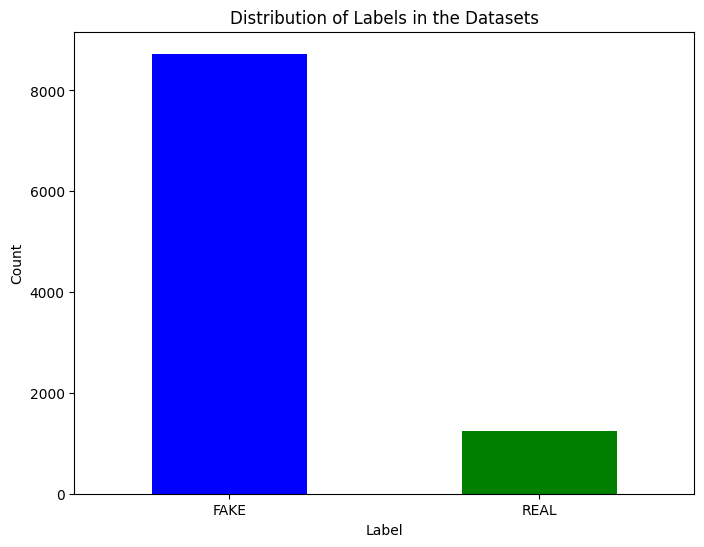

In [2]:
import matplotlib.pyplot as plt

new_dataset = pd.read_csv("classic_dataset.csv")


label_counts = new_dataset["LABEL"].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind="bar", color=["blue", "green"])
plt.title("Distribution of Labels in the Datasets")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

2. **Data Augmentation**
To address the imbalance in our dataset, which contains significantly more fake audio samples than real ones, we applied the following approach for the real audio files in the training set:

- Instead of creating non-overlapping 3-second segments, we generated overlapping segments.
- Each segment is 3 seconds long with a step of 1.5 seconds between the start of consecutive segments.

This helped in generating additional training samples by making small modifications to the original audio files. 

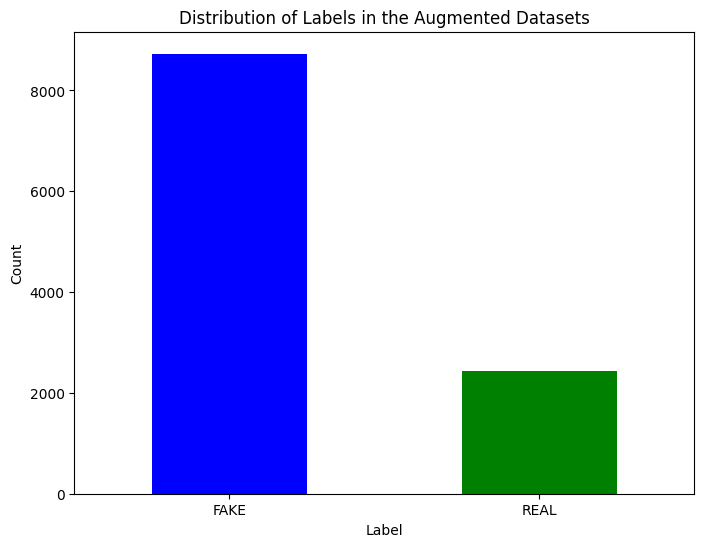

In [3]:
aug_dataset = pd.read_csv("classic_dataset_augmented.csv")


label_counts = aug_dataset["LABEL"].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind="bar", color=["blue", "green"])
plt.title("Distribution of Labels in the Augmented Datasets")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


<u>Data Extraction Methods</u>

We extracted data using two distinct methods to facilitate our analysis and model training:

1. **Feature Vectors from Audio Segments**
For the first method, we processed the audio files by splitting them into 3-second segments and extracting relevant features. These features, which included chroma_stft, rms, spectral_centroid, spectral_bandwidth, and various MFCCs, were compiled into a CSV file. This file contained the feature vectors for each audio segment, serving as the input for traditional machine learning models such as Random Forest, SVM, KNN, and XGBoost. The feature extraction allowed us to capture the essential characteristics of the audio in a structured format suitable for these models.

A) After extracting feature vectors from audio data we conclude with the following dataset :

In [4]:
new_dataset.head(3)

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,original_sample,LABEL
0,0.406384,0.000002,1726.659103,1313.571519,2691.655585,0.166597,-1100.7047,24.245398,-4.094656,-11.856869,...,-0.645655,-1.132683,-2.797139,-3.261496,-0.838549,0.040131,-0.060138,-1.380203,biden-to-linus,FAKE
1,0.488609,0.000002,1494.082478,1153.538601,2407.413564,0.133025,-1096.9451,24.470573,-14.613540,-24.321949,...,-4.825898,-5.560425,-2.493666,0.818739,1.947798,2.038546,0.929982,-0.998090,biden-to-linus,FAKE
2,0.362642,0.000003,1782.153328,1487.245881,3030.917553,0.133561,-1091.5063,32.406384,6.421868,0.284660,...,-2.619975,-1.499475,-1.358122,-2.547379,-2.780402,-4.007704,-1.956772,-2.554486,biden-to-linus,FAKE


B) After extracting feature vectors from Data Augmentation we conclude with the following dataset 

In [5]:
aug_dataset.head(3)

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,original_sample,LABEL
0,0.406384,0.000002,1726.659103,1313.571519,2691.655585,0.166597,-1100.7047,24.245398,-4.094656,-11.856869,...,-0.645655,-1.132683,-2.797139,-3.261496,-0.838549,0.040131,-0.060138,-1.380203,biden-to-linus,FAKE
1,0.488609,0.000002,1494.082478,1153.538601,2407.413564,0.133025,-1096.9451,24.470573,-14.613540,-24.321949,...,-4.825898,-5.560425,-2.493666,0.818739,1.947798,2.038546,0.929982,-0.998090,biden-to-linus,FAKE
2,0.362642,0.000003,1782.153328,1487.245881,3030.917553,0.133561,-1091.5063,32.406384,6.421868,0.284660,...,-2.619975,-1.499475,-1.358122,-2.547379,-2.780402,-4.007704,-1.956772,-2.554486,biden-to-linus,FAKE


As we can see on the new dataset there is column that give us the information of the origin of each segment and we know exactly the stepts have made for cleaning and transforming.

2. **Mel-spectrogram Images for CNN**
The second method involved generating mel-spectrogram images from the audio segments stored in pickle format. These images visually represent the frequency distribution of the audio over time, providing a rich and detailed depiction of the audio signal. We saved these mel-spectrogram images as files to be used as input mostly for Convolutional Neural Networks (CNNs). CNNs are particularly well-suited for image data, and by using mel-spectrograms, we aimed to leverage the deep learning capabilities of CNNs to identify intricate patterns and features in the audio data.

Let's take a look at one small segment created

### 4.  Modeling

**Data Splitting and Preparation**

In our data preparation process, we employed a strategic approach to split the dataset into training, validation, and test sets. The primary objective was to ensure that the test set included all audio samples from specific individuals (Margot Robbie and Ryan Gosling) while maintaining a balanced and stratified distribution for the remaining data. This method helps us evaluate our model's performance on unseen data effectively.

- Test Set Creation :To create a robust test set, we identified and excluded all real and fake audio samples related to Margot Robbie and Ryan Gosling. This decision was made to ensure that the test set reflects a scenario where the model encounters entirely new speakers during evaluation. The steps involved were as follows:

- Identification of Test Samples: We generated a list of original test samples by appending "-original" to the names of the speakers (Margot Robbie and Ryan Gosling).Additionally, we created a list of potential fake test samples by appending "-to" to the same speaker names.
We then identified the actual fake test samples by checking if any string from the potential fake test samples was present in the original samples.

- Extraction of Test Set: We filtered the dataset to include only those samples where the original_sample matched the identified test samples.
These test samples were removed from the dataset to ensure they were not included in the training or validation sets.

- Training and Validation Set Creation: For the remaining data, we split it into training and validation sets in a stratified manner based on the labels. This approach ensures that both sets have a proportional representation of each class, maintaining the balance necessary for effective model training and evaluation. 

- The process varied slightly based on the type of data:

    1. For Image Data:The data was split directly into training and validation sets using the train_test_split function, with stratification based on the LABEL column.

    2. For Tabular Data: Before splitting, we normalized the features (all columns except the last two) using StandardScaler. This step ensures that the features have a mean of 0 and a standard deviation of 1, which is crucial for algorithms that are sensitive to feature scaling.

- After normalization, we split the data into training and validation sets, maintaining stratification based on the LABEL column.The test set features were also normalized using the same scaler to ensure consistency in feature scaling across all sets.
